In [1]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [2]:
path = ''

#filename = 'data/output_populations_3-1000-h-l.csv'
filename = 'data/output_populations_3-1000-0.01-l.csv'
filename2 = 'data/output_pops_E.csv'
st = 200
ed = 900

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']
dfS_3 = df['3']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3})

print(df.head(10))

iteration  species_1  species_2  species_3
200        201         20      37961      36750
201        202         16      37963      36927
202        203         13      37965      37082
203        204         10      37969      37248
204        205         12      37973      37419
205        206          8      37979      37562
206        207         14      37987      37707
207        208         11      37990      37831
208        209         14      37992      37967
209        210         13      37993      38086


In [3]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 or df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics        -5.944869e+00
p-Value                 2.216438e-07
#Lags used              8.000000e+00
Observ used             6.910000e+02
Critical Value (1%)    -3.439849e+00
Critical Value (5%)    -2.865732e+00
Critical Value (10%)   -2.569002e+00
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=376.4584, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=378.0811, p=0.0000  , df=1
likelihood ratio test: chi2=302.2191, p=0.0000  , df=1
parameter F test:         F=376.4584, p=0.0000  , df_denom=696, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2973.7719, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=2986.5899, p=0.0000  , df=1
likelihood ratio test: chi2=1162.1121, p=0.0000  , df=1
parameter F test:         F=2973.7719, p=0.0000  , df_denom=696, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=218.0437, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=218.9836, p=0.0000  , df=1
likelihood ratio test: chi2=190.4976, p=0.0000  , df=1
parameter F test:         F=218.0437, p=0.0000  , df_denom=696, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero

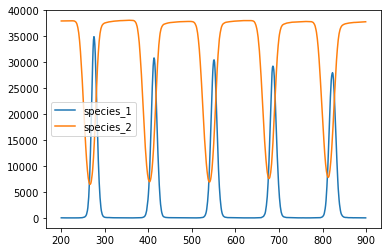

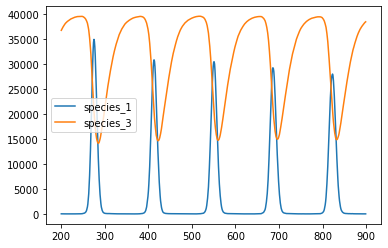

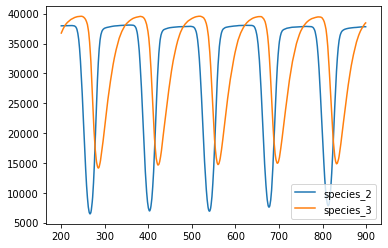

In [4]:
maxlag = [1]
def GCT(dataframe):
    print('\n\n1 eats 2?')
    grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag)
    print('\n\n2 eats 1?')
    grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag)
    dataframe[['species_1', 'species_2']].plot()

    print('\n\n1 eats 3?')
    grangercausalitytests(dataframe[['species_1', 'species_3']], maxlag=maxlag)
    print('\n\n3 eats 1?')
    grangercausalitytests(dataframe[['species_3', 'species_1']], maxlag=maxlag)
    dataframe[['species_1', 'species_3']].plot()

    print('\n\n2 eats 3?')
    grangercausalitytests(dataframe[['species_2', 'species_3']], maxlag=maxlag)
    print('\n\n3 eats 2?')
    grangercausalitytests(dataframe[['species_3', 'species_2']], maxlag=maxlag)
    dataframe[['species_2', 'species_3']].plot()

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS) estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2  species_3
0  -0.457756   0.650128   0.579213
1  -0.458247   0.650321   0.600397
2  -0.458615   0.650514   0.618948
3  -0.458983   0.650900   0.638816
4  -0.458738   0.651286   0.659282
5  -0.459229   0.651865   0.676397
6  -0.458493   0.652637   0.693751
7  -0.458861   0.652927   0.708592
8  -0.458493   0.653120   0.724869
9  -0.458615   0.653216   0.739112


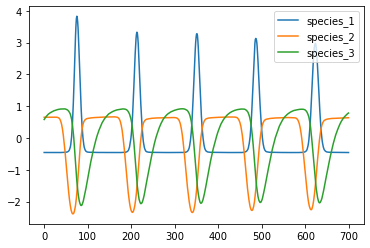

In [5]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2','species_3']].plot()

species_1  species_2  species_3
200   2.995732  10.544315  10.511894
201   2.772589  10.544367  10.516698
202   2.564949  10.544420  10.520887
203   2.302585  10.544525  10.525354
204   2.484907  10.544631  10.529934
205   2.079442  10.544789  10.533748
206   2.639057  10.544999  10.537601
207   2.397895  10.545078  10.540884
208   2.639057  10.545131  10.544473
209   2.564949  10.545157  10.547602


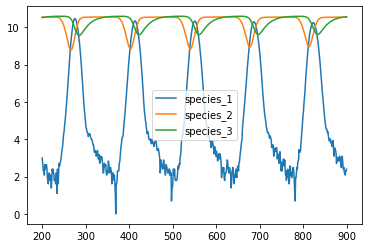

In [6]:
# Log-Transformation

logged_df = np.log(test)
print(logged_df.head(10))
logged_df[['species_1','species_2','species_3']].plot()

In [7]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(scaled_df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 or df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics        -5.944869e+00
p-Value                 2.216438e-07
#Lags used              8.000000e+00
Observ used             6.910000e+02
Critical Value (1%)    -3.439849e+00
Critical Value (5%)    -2.865732e+00
Critical Value (10%)   -2.569002e+00
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=376.4584, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=378.0811, p=0.0000  , df=1
likelihood ratio test: chi2=302.2191, p=0.0000  , df=1
parameter F test:         F=376.4584, p=0.0000  , df_denom=696, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2973.7719, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=2986.5899, p=0.0000  , df=1
likelihood ratio test: chi2=1162.1121, p=0.0000  , df=1
parameter F test:         F=2973.7719, p=0.0000  , df_denom=696, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=218.0437, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=218.9836, p=0.0000  , df=1
likelihood ratio test: chi2=190.4976, p=0.0000  , df=1
parameter F test:         F=218.0437, p=0.0000  , df_denom=696, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero

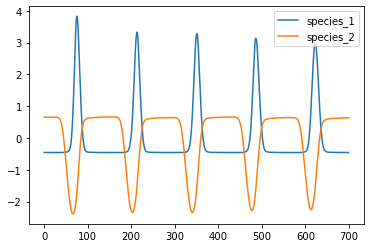

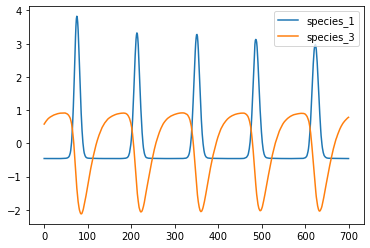

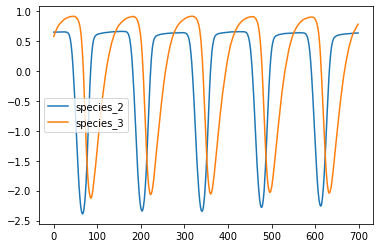

In [8]:
GCT(scaled_df)



1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=279.1953, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=280.3987, p=0.0000  , df=1
likelihood ratio test: chi2=235.7644, p=0.0000  , df=1
parameter F test:         F=279.1953, p=0.0000  , df_denom=696, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=333.9007, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=335.3399, p=0.0000  , df=1
likelihood ratio test: chi2=273.9157, p=0.0000  , df=1
parameter F test:         F=333.9007, p=0.0000  , df_denom=696, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=223.5136, p=0.0000  , df_denom=696, df_num=1
ssr based chi2 test:   chi2=224.4770, p=0.0000  , df=1
likelihood ratio test: chi2=194.6681, p=0.0000  , df=1
parameter F test:         F=223.5136, p=0.0000  , df_denom=696, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero) 1


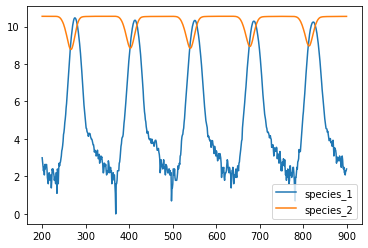

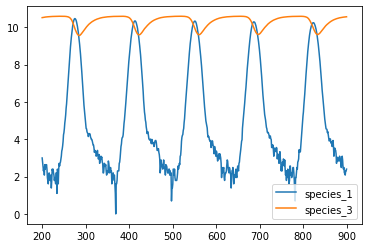

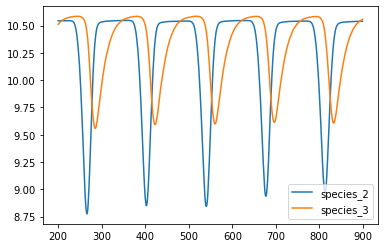

In [9]:
GCT(logged_df)

species_1  species_2  species_3
0   -0.457756   0.650128   0.579213
10  -0.458493   0.653409   0.751439
20  -0.459229   0.653699   0.838689
30  -0.459474   0.648777   0.888957
40  -0.458615   0.429311   0.911697
50  -0.450638  -0.745514   0.905713
60  -0.288274  -2.125232   0.750482
70   2.378278  -2.269227  -0.381737
80   2.728656  -0.791840  -1.935127
90  -0.107747   0.468688  -1.977136


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=250.4303, p=0.0000  , df_denom=66, df_num=1
ssr based chi2 test:   chi2=261.8135, p=0.0000  , df=1
likelihood ratio test: chi2=108.1539, p=0.0000  , df=1
parameter F test:         F=250.4303, p=0.0000  , df_denom=66, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=101.4568, p=0.0000  , df_denom=66, df_num=1
ssr based chi2 test:   chi2=106.0685, p=0.0000  , df=1
likelihood ratio test: chi2=64.2439 , p=0.0000  , df=1
parameter F test:         F=101.4568, p=0.0000  , df_den

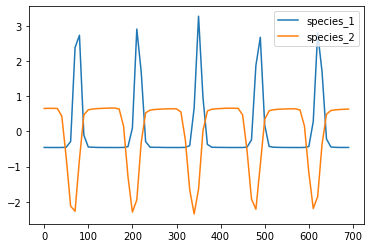

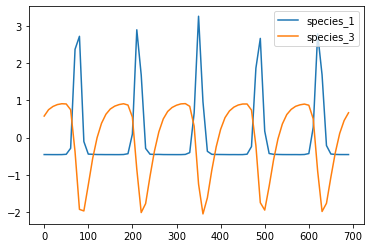

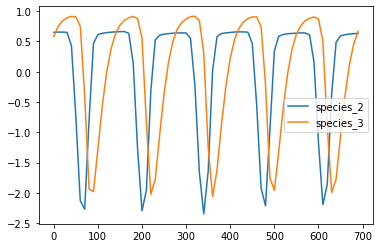

In [10]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

species_1  species_2  species_3
0    -0.457756   0.650128   0.579213
50   -0.450638  -0.745514   0.905713
100  -0.445484   0.612778  -1.277578
150  -0.458983   0.661034   0.770589
200   0.093398  -2.294319   0.551565
250  -0.454688   0.620017  -0.364143
300  -0.459597   0.638643   0.871363
350   3.269379  -1.642486  -1.252085
400  -0.456652   0.647812   0.220756
450  -0.458861   0.462415   0.904157


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4426  , p=0.5209  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.5754  , p=0.4481  , df=1
likelihood ratio test: chi2=0.5630  , p=0.4531  , df=1
parameter F test:         F=0.4426  , p=0.5209  , df_denom=10, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0061  , p=0.9392  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.0079  , p=0.9290  , df=1
likelihood ratio test: chi2=0.0079  , p=0.9290  , df=1
parameter F test:         F=0.0061  , p=0.9392

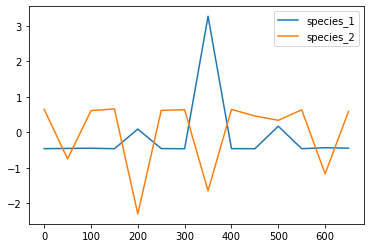

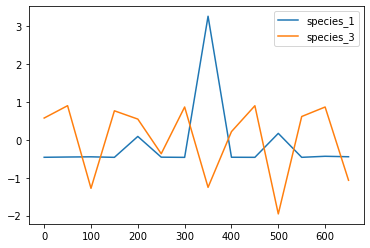

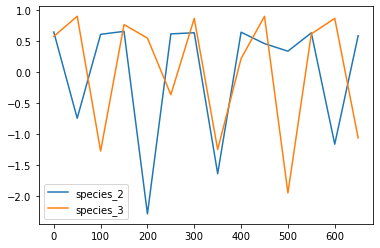

In [11]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)